In [2]:
import numpy as np
import skimage.io as io
import scipy.signal as sig
import scipy.stats as stats
import scipy.ndimage as ndimg

%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

/Users/connor/anaconda/envs/cs636/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/connor/anaconda/envs/cs636/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


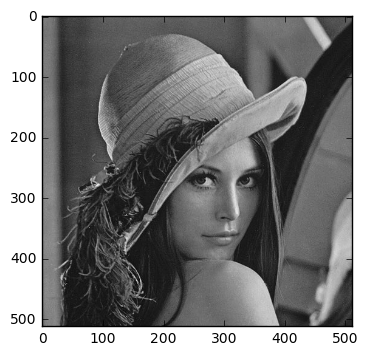

In [3]:
img = io.imread("lena.bmp").mean(axis=2)
img = np.matrix(img)

plt.imshow(img, cmap="gray")

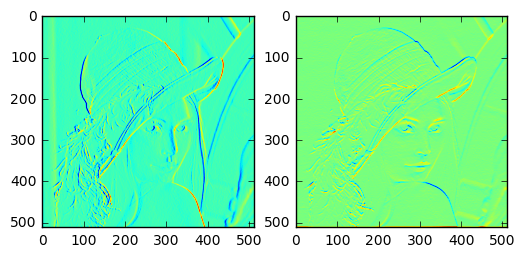

In [9]:
edge = np.matrix([[-1., 0., 1.]])

img_x = ndimg.gaussian_filter(sig.convolve2d(img, edge, mode="same"), sigma)
img_y = ndimg.gaussian_filter(sig.convolve2d(img, edge.T, mode="same"), sigma)

_, ax = plt.subplots(1,2)
ax[0].imshow(img_x)
ax[1].imshow(img_y)

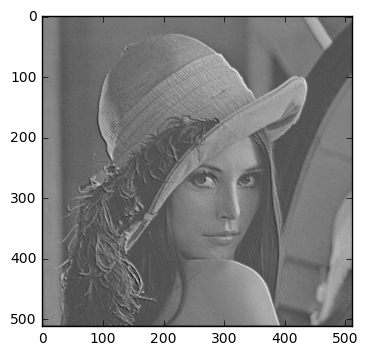

In [10]:
@interact(
    u=(-5., 5., 0.05),
    v=(-5., 5., 0.05)
)
def taylor_shift_demo(u=1., v=-1.):
    I = img + img_x*u + img_y*v
    plt.imshow(I, cmap="gray")

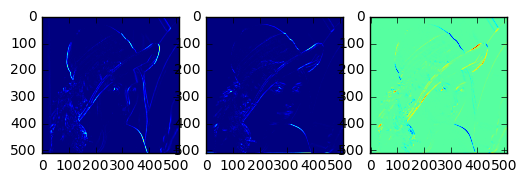

In [11]:
sigma = 1.

img_xx = ndimg.gaussian_filter(np.multiply(img_x, img_x), sigma)
img_yy = ndimg.gaussian_filter(np.multiply(img_y, img_y), sigma)
img_xy = ndimg.gaussian_filter(np.multiply(img_x, img_y), sigma)

_, ax = plt.subplots(1,3)
ax[0].imshow(img_xx)
ax[1].imshow(img_yy)
ax[2].imshow(img_xy)

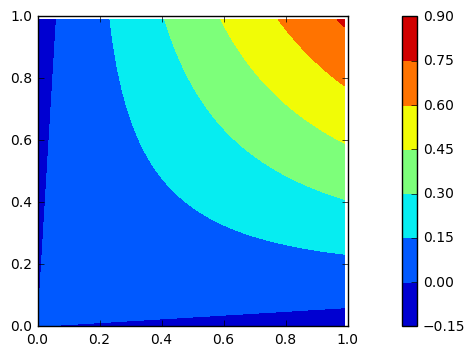

In [7]:
@interact(
    lmin=fixed(0.), lmax=fixed(1.),
    alpha=(0., 1., 0.002)
)
def corner_resp_fn_demo(lmin=0., lmax=1., alpha=0.05):
    step = (lmax - lmin) / 100

    l1 = np.arange(lmin, lmax, step)
    l2 = np.arange(lmin, lmax, step)
    L1, L2 = np.meshgrid(l1, l2)

    R = L1*L2 - alpha*(L1+L2)**2

    CF = plt.contourf(L1, L2, R)
    plt.colorbar(CF)
    plt.axis("square")

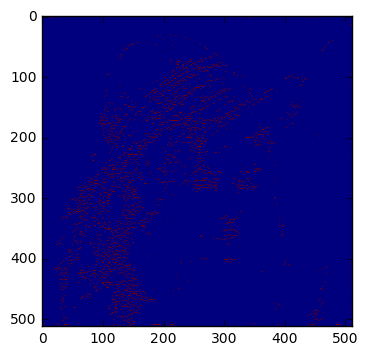

In [16]:
def corner_resp(xx, yy, xy, a):
    det = xx * yy - xy ** 2
    trace = xx + yy

    corner_resp = det - a * trace ** 2
    return corner_resp

@interact(
    alpha=(0., 0.2, 0.002),
    thresh=(0.,500.,10.)
)
def corner_resp_demo(alpha=0.05, thresh=25.):
    resp = corner_resp(img_xx, img_yy, img_xy, alpha)
        
    resp_t = np.where(resp>thresh, resp, np.zeros_like(resp))
    
    corners = sig.argrelmax(resp_t)
    canvas = np.zeros_like(img)
    canvas[corners] = 1.
        
    _, ax = plt.subplots(1,1)
    #ax[0].imshow(resp)
    #ax[0].imshow(np.log(resp))
    #ax[1].imshow(resp_t)
    ax.imshow(canvas)